# Database

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# Context

Predict next-day rain by training classification models. The target variable is RainTomorrow.

# Content

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

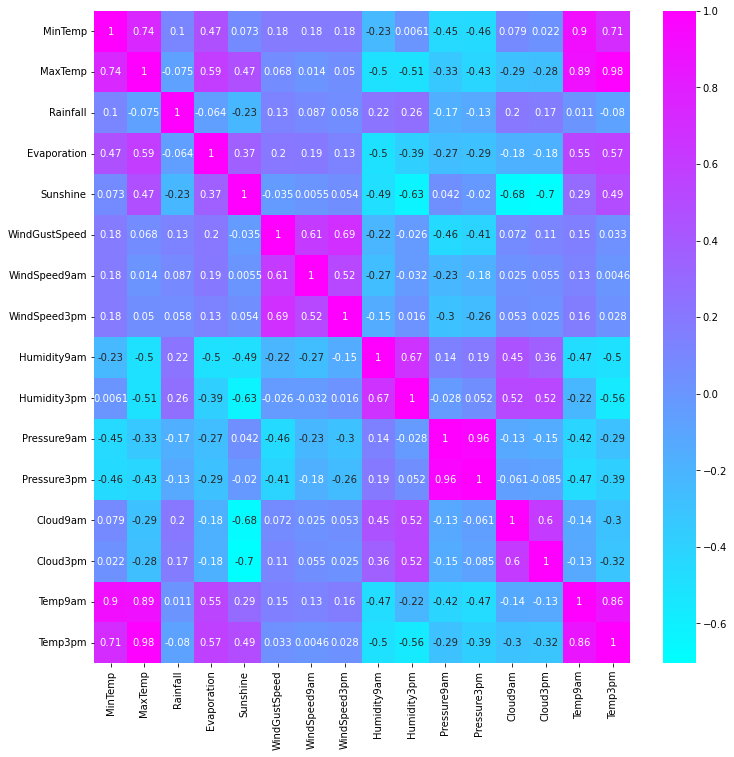

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='cool')
plt.tight_layout

# Missing values

Displaying the total count of missing values per column:

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Displaying of the **total count of missing values per column in percentage**:

In [9]:
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [10]:
df['RainTomorrow'].nunique()

2

In [11]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

The goal is to predict whether it will rain in the following day or not and as such there are **two possible results, Yes and No**.

It is also determined that there are **more instances where there wasn't rain** in the folowing day than instances that there was.

## Eliminating the rows in which there are no values in 'RainTomorrow'

As the goal is to predict the results in the RainTomorrow column, the missing values in this column are simply dropped

In [12]:
df.dropna(subset=['RainTomorrow'],inplace=True)

## Getting variables for the RainTomorrow

Converting the categorical variable "RainTomorrow" into dummy variables in the column "Rain Tomorrow". **1** replaces for **Yes** and **0** replaces **No**

In [13]:
df['Rain Tomorrow'] = pd.get_dummies(df['RainTomorrow'],drop_first=True, dtype=int)

In [14]:
df.corr()['Rain Tomorrow'].drop('Rain Tomorrow').sort_values()

Sunshine        -0.450768
Pressure9am     -0.246371
Pressure3pm     -0.226031
Temp3pm         -0.192424
MaxTemp         -0.159237
Evaporation     -0.119285
Temp9am         -0.025691
MinTemp          0.083936
WindSpeed3pm     0.087817
WindSpeed9am     0.090995
WindGustSpeed    0.234010
Rainfall         0.239032
Humidity9am      0.257161
Cloud9am         0.317380
Cloud3pm         0.381870
Humidity3pm      0.446160
Name: Rain Tomorrow, dtype: float64

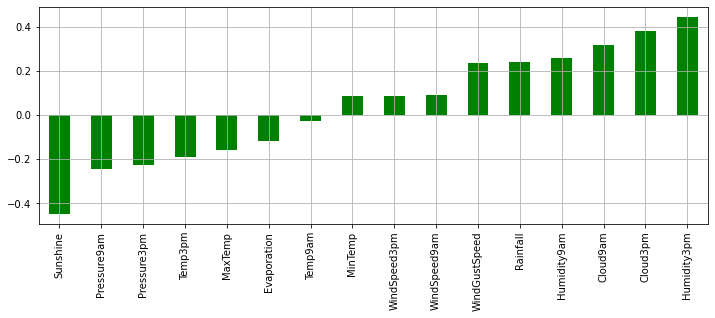

In [15]:
plt.figure(figsize=(12,4))
# plt.grid()
df.corr()['Rain Tomorrow'].drop('Rain Tomorrow').sort_values().plot(kind='bar',color = 'green')
plt.grid()

It is noted that the **humidity at 3pm** is the feature that is the **most correlated** with Rain Tomorrow and **Sunshine** is the feature that is the **most negatively correlated** with Rain Tomorrow

## Converting the Date to datetime

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rain Tomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0


# Adding the year, month and day columns to the dataframe

In [17]:
year = df['Date'].apply(lambda date: date.year)
df.insert(1, "Year", year)

month = df['Date'].apply(lambda date: date.month)
df.insert(2, "Month", month)

day = df['Date'].apply(lambda date: date.day)
df.insert(3, "Day", day)

df.head()

,Date,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rain Tomorrow
0,2008-12-01,2008,12,1,Albury,13.4,22.9,0.6,NaN,NaN,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0
1,2008-12-02,2008,12,2,Albury,7.4,25.1,0.0,NaN,NaN,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0
2,2008-12-03,2008,12,3,Albury,12.9,25.7,0.0,NaN,NaN,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0
3,2008-12-04,2008,12,4,Albury,9.2,28.0,0.0,NaN,NaN,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0
4,2008-12-05,2008,12,5,Albury,17.5,32.3,1.0,NaN,NaN,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0


**For the following analyses is good to take into consideration that the data was taken from weather stations all over Australia and not just one location**

Displaying the number of instances for each month:

In [18]:
df['Month'].value_counts().sort_index()

1     12921
2     10525
3     13036
4     11306
5     13055
6     12389
7     11779
8     11762
9     11345
10    11804
11    11461
12    10810
Name: Month, dtype: int64

Displaying the number of instances for each month where it rained in the following day:

In [19]:
df[df['Rain Tomorrow']==1]['Month'].value_counts().sort_index()

1     2498
2     2207
3     2781
4     2463
5     2941
6     3244
7     3171
8     2970
9     2606
10    2310
11    2436
12    2250
Name: Month, dtype: int64

Displaying the **percentage of days that it rained for each month**.

In [20]:
round(df[df['Rain Tomorrow']==1]['Month'].value_counts().sort_index()/df['Month'].value_counts().sort_index()*100,2)

1     19.33
2     20.97
3     21.33
4     21.78
5     22.53
6     26.18
7     26.92
8     25.25
9     22.97
10    19.57
11    21.25
12    20.81
Name: Month, dtype: float64

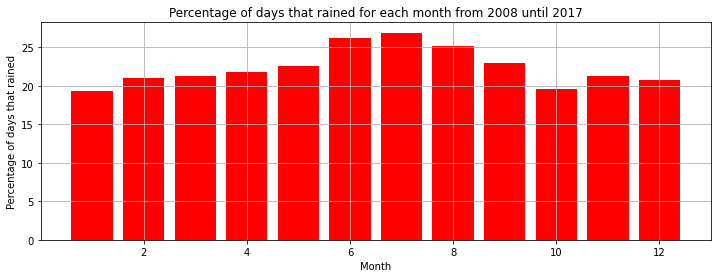

In [21]:
plt.figure(figsize=(12,4))
plt.bar(round(df[df['Rain Tomorrow']==1]['Month'].value_counts().sort_index()/df['Month'].value_counts().sort_index()*100,2).index,round(df[df['Rain Tomorrow']==1]['Month'].value_counts().sort_index()/df['Month'].value_counts().sort_index()*100,2),color='red')
plt.ylabel('Percentage of days that rained')
plt.xlabel('Month')
plt.title('Percentage of days that rained for each month from 2008 until 2017')
plt.grid()
plt.show()

From the plot presented above, it can be seen that the months where it **rained the most were June, July and August** and the months where it **rained the least were October, December and January**, which makes sense as Australia is in the southern hemisphere.

# Understanding the Location Feature

In [22]:
df['Location'].nunique()

49

In [23]:
df['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


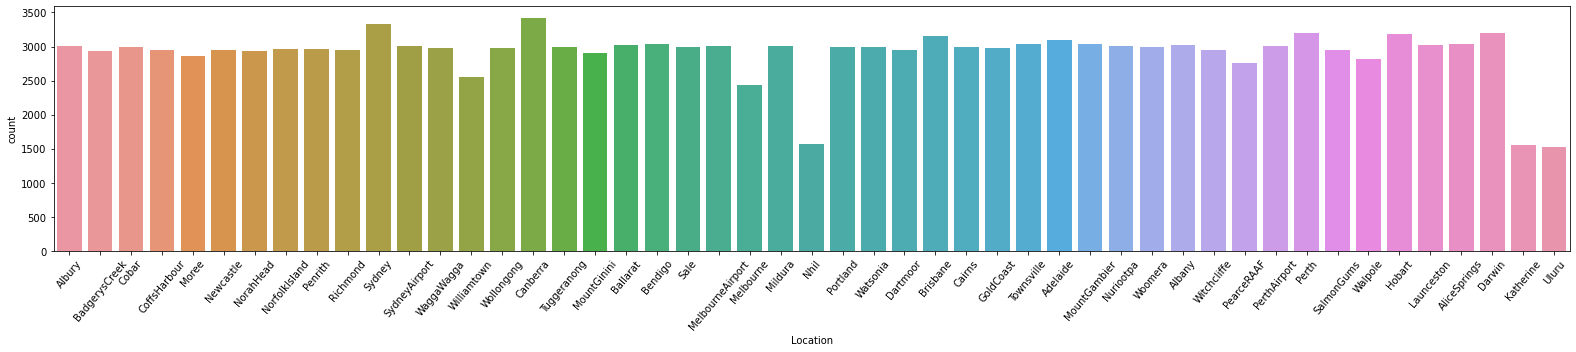

In [24]:
plt.figure(figsize=(22,5))
ax = sns.countplot(x='Location',data=df)

ax.tick_params(axis='x', rotation=50)
plt.tight_layout()
plt.show()

## Tranforming into North, Center and South

As there are 49 different locations, which, except for 5 locations, have more or less the same amount of instances, and the goal is to predict if it will rain in the next day or not, this feature will be transformed as an analysis for the 49 locations would become too burdensome.

These locations will be transformed into 3 different variables, North, Center and South, taking into consideration their location in the map.

In [25]:
North = ['Darwin','Hobart','Townsville','Cairns','Katherine']
Center = ['Brisbane','AliceSprings','GoldCoast','NorfolkIsland','Uluru']
South = ['Canberra','Sydney','Perth','Adelaide','Bendigo','MountGambier','Launceston',
         'Ballarat','Albany','Albury','PerthAirport','MelbourneAirport','Mildura','SydneyAirport','Nuriootpa',
         'Sale','Watsonia','Tuggeranong','Portland','Woomera','Cobar','Wollongong','WaggaWagga',
         'Penrith','SalmonGums','Newcastle','CoffsHarbour','Witchcliffe','Richmond','Dartmoor',
        'NorahHead','BadgerysCreek','MountGinini','Moree','Walpole','PearceRAAF','Williamtown','Melbourne',
        'Nhil']

In [26]:
def LocationTransform(location):
    if location in Center:
        return 'Center'
    elif location in South:
        return 'South'
    elif location in North:
        return 'North'

In [27]:
df['Location'] = df['Location'].apply(lambda location: LocationTransform(location))

In [28]:
df['Location'].value_counts()

South     114576
North      13960
Center     13657
Name: Location, dtype: int64

In [29]:
round(df['Location'].value_counts()/len(df['Location'])*100,1)

South     80.6
North      9.8
Center     9.6
Name: Location, dtype: float64

It can be observed that the great majority of the data was taken in weather stations that were located in the south part of Australia.

The **South** has **80,6%** of the values, the **North** part has **9.8%** of the values and the **Center** part has **9.6%** of the values.

In [30]:
df[df['Rain Tomorrow']==1]['Location'].value_counts()

South     25767
North      3347
Center     2763
Name: Location, dtype: int64

Measuring the quantity of values where there was Rain in the next day per geographical part

In [31]:
round(df[df['Rain Tomorrow']==1]['Location'].value_counts()/len(df[df['Rain Tomorrow']==1])*100,1)

South     80.8
North     10.5
Center     8.7
Name: Location, dtype: float64

The amount of values the data tells us that there was rain in the following day is approximately the same as the distribution of the values per geographical part as the values are 80.8%, 10.5% and 8.7% in the South, North and Center, respectively. 

**Getting dummy variables for the locations**

As of now there are 3 possible locations in a categorical variable, they will be turned into dummy variables.

In [32]:
Location_dummy = pd.get_dummies(df['Location'], dtype=int)
df = pd.concat([df, Location_dummy], axis=1)
df.head()

,Date,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rain Tomorrow,Center,North,South
0,2008-12-01,2008,12,1,South,13.4,22.9,0.6,NaN,NaN,...,8.0,NaN,16.9,21.8,No,No,0,0,0,1
1,2008-12-02,2008,12,2,South,7.4,25.1,0.0,NaN,NaN,...,NaN,NaN,17.2,24.3,No,No,0,0,0,1
2,2008-12-03,2008,12,3,South,12.9,25.7,0.0,NaN,NaN,...,NaN,2.0,21.0,23.2,No,No,0,0,0,1
3,2008-12-04,2008,12,4,South,9.2,28.0,0.0,NaN,NaN,...,NaN,NaN,18.1,26.5,No,No,0,0,0,1
4,2008-12-05,2008,12,5,South,17.5,32.3,1.0,NaN,NaN,...,7.0,8.0,17.8,29.7,No,No,0,0,0,1


In [33]:
# Reorgazining the columns
new_cols_order = ['Date', 'Year', 'Month', 'Day', 'Location', 'Center', 'North', 'South', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Rain Tomorrow']

**Reorganizing the dataframe**

In [34]:
df = df[new_cols_order]
df.head()

,Date,Year,Month,Day,Location,Center,North,South,MinTemp,MaxTemp,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rain Tomorrow
0,2008-12-01,2008,12,1,South,0,0,1,13.4,22.9,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0
1,2008-12-02,2008,12,2,South,0,0,1,7.4,25.1,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0
2,2008-12-03,2008,12,3,South,0,0,1,12.9,25.7,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0
3,2008-12-04,2008,12,4,South,0,0,1,9.2,28.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0
4,2008-12-05,2008,12,5,South,0,0,1,17.5,32.3,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0


In [35]:
df.corr()['Rain Tomorrow'][['Center','North','South']]

Center   -0.017092
North     0.012322
South     0.003462
Name: Rain Tomorrow, dtype: float64

The correlation values between the Location variable and the Rain Tomorrow variable are small, meaning that there is not a higher tendency to rain in any of them when compared to the others.

# MinTemp

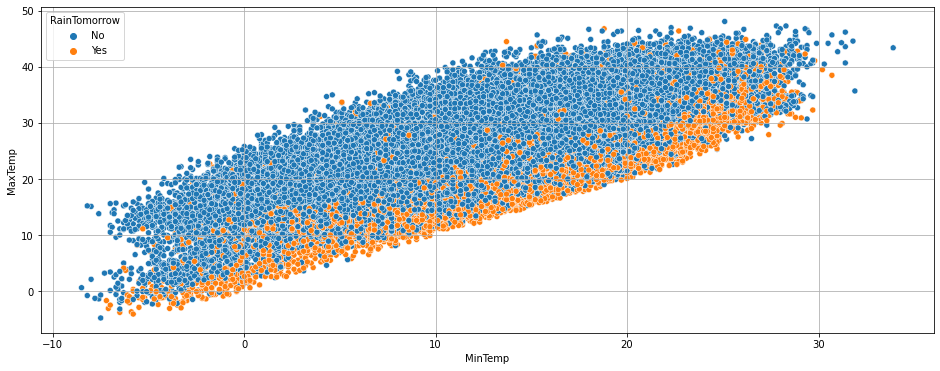

In [36]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='MinTemp',y='MaxTemp',data=df,hue='RainTomorrow')
plt.grid()

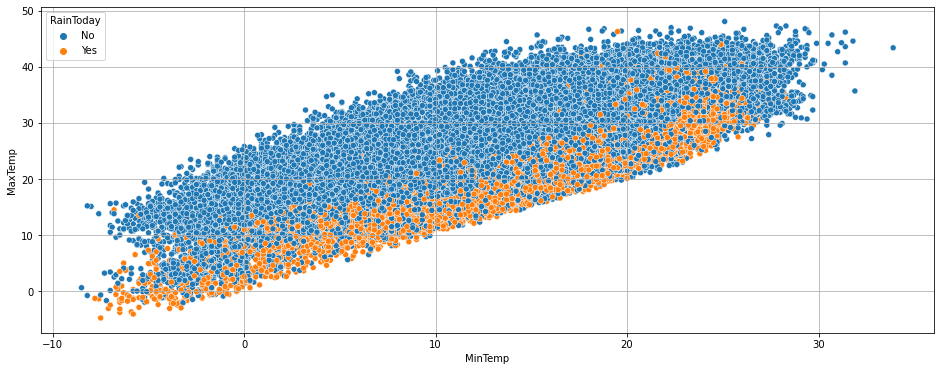

In [37]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='MinTemp',y='MaxTemp',data=df,hue='RainToday')
plt.grid()

It can be seen that the combination of small MinTemp and small MaxTemp leads to raining in the current and the following days, as expected

In [38]:
df.isnull().sum()['MinTemp']

637

In [39]:
df.corr()['MinTemp'].drop('MinTemp').sort_values(ascending=False)

Temp9am          0.901813
MaxTemp          0.736267
Temp3pm          0.708865
Evaporation      0.467261
North            0.332690
Center           0.182009
WindGustSpeed    0.177285
WindSpeed9am     0.176005
WindSpeed3pm     0.175749
Rainfall         0.104255
Rain Tomorrow    0.083936
Cloud9am         0.077625
Sunshine         0.072961
Year             0.039245
Cloud3pm         0.020489
Humidity3pm      0.005999
Day              0.001507
Month           -0.204279
Humidity9am     -0.234211
South           -0.385796
Pressure9am     -0.451260
Pressure3pm     -0.461623
Name: MinTemp, dtype: float64

In [40]:
print(df[['MinTemp', 'Temp9am']].isnull().all(axis=1).sum(),
df[['MinTemp', 'MaxTemp']].isnull().all(axis=1).sum())

356 88


As these variables are highly correlated with each ohter and have few missing values, a linear regression will be used based on them to fill in the null values

In [41]:
LR_var1 = 'MinTemp'
LR_var2 = 'Temp9am'

initial_nans = df[LR_var1].isnull().sum()

df_temp = df.dropna(subset=[LR_var1])
df_temp = df_temp.dropna(subset=[LR_var2])

X = df_temp[LR_var2].values.reshape(-1,1)
y = df_temp[LR_var1].values.reshape(-1,1)


## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Print the interception and coefficient
print('{} = {:.4f} + {:.4f} * {}'.format(LR_var1,regr.intercept_[0], regr.coef_[0][0],LR_var2))

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
r2_value = r2_score(y, regr.predict(X))
print('R^2: {:.4f}'.format(r2_value))


Var1_linear = {LR_var1:regr.intercept_[0]+df[LR_var2]*regr.coef_[0][0]}
var1_df = pd.DataFrame(data=Var1_linear)
df=df.fillna(var1_df)

print('Number of rows corrected: {}'.format(initial_nans-df[LR_var1].isnull().sum()))

MinTemp = -2.8731 + 0.8877 * Temp9am
R^2: 0.8133
Number of rows corrected: 281


In [42]:
LR_var1 = 'MinTemp'
LR_var2 = 'MaxTemp'

initial_nans = df[LR_var1].isnull().sum()

df_temp = df.dropna(subset=[LR_var1])
df_temp = df_temp.dropna(subset=[LR_var2])

X = df_temp[LR_var2].values.reshape(-1,1)
y = df_temp[LR_var1].values.reshape(-1,1)


## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Print the interception and coefficient
print('{} = {:.4f} + {:.4f} * {}'.format(LR_var1,regr.intercept_[0], regr.coef_[0][0],LR_var2))

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
r2_value = r2_score(y, regr.predict(X))
print('R^2: {:.4f}'.format(r2_value))


Var1_linear = {LR_var1:regr.intercept_[0]+df[LR_var2]*regr.coef_[0][0]}
var1_df = pd.DataFrame(data=Var1_linear)
df=df.fillna(var1_df)

print('Number of rows corrected: {}'.format(initial_nans-df[LR_var1].isnull().sum()))

MinTemp = -3.2059 + 0.6626 * MaxTemp
R^2: 0.5423
Number of rows corrected: 273


In [43]:
sum(np.isnan(df['MinTemp']))

83

As there are few missing values, they will be now dropped

In [44]:
df = df.dropna(subset=['MinTemp'])

# Temp9am

<AxesSubplot:xlabel='Temp9am', ylabel='MaxTemp'>

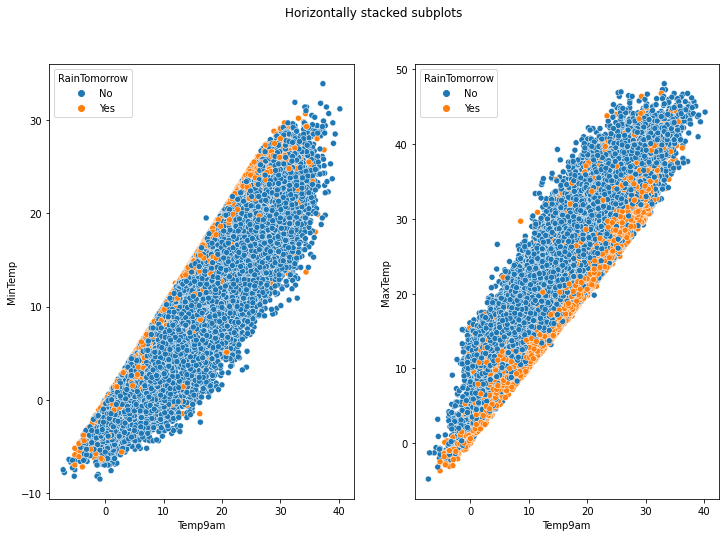

In [45]:
fig, ax = plt.subplots(1, 2,figsize=(12,8))
fig.suptitle('Horizontally stacked subplots')
sns.scatterplot(x='Temp9am', y='MinTemp',data=df,hue='RainTomorrow', ax=ax[0])
sns.scatterplot(x='Temp9am', y='MaxTemp',data=df,hue='RainTomorrow', ax=ax[1])

In [46]:
df.isnull().sum()['Temp9am']

821

In [47]:
df.corr()['Temp9am'].drop('Temp9am').sort_values(ascending=False)

MinTemp          0.901931
MaxTemp          0.887020
Temp3pm          0.860574
Evaporation      0.545497
North            0.312245
Sunshine         0.291139
Center           0.216558
WindSpeed3pm     0.163601
WindGustSpeed    0.150258
WindSpeed9am     0.129298
Year             0.041853
Rainfall         0.011477
Day             -0.000849
Rain Tomorrow   -0.025691
Cloud3pm        -0.127869
Month           -0.136625
Cloud9am        -0.137843
Humidity3pm     -0.221467
South           -0.396245
Pressure9am     -0.422773
Pressure3pm     -0.470325
Humidity9am     -0.472826
Name: Temp9am, dtype: float64

In [194]:
print(df[['Temp9am', 'MinTemp']].isnull().all(axis=1).sum())

0


As these variables are highly correlated with each ohter and have few missing values, a linear regression will be used based on them to fill in the null values

In [49]:
LR_var1 = 'Temp9am'
LR_var2 = 'MinTemp'

initial_nans = df[LR_var1].isnull().sum()

df_temp = df.dropna(subset=[LR_var1])
df_temp = df_temp.dropna(subset=[LR_var2])

X = df_temp[LR_var2].values.reshape(-1,1)
y = df_temp[LR_var1].values.reshape(-1,1)


## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Print the interception and coefficient
print('{} = {:.4f} + {:.4f} * {}'.format(LR_var1,regr.intercept_[0], regr.coef_[0][0],LR_var2))

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
r2_value = r2_score(y, regr.predict(X))
print('R^2: {:.4f}'.format(r2_value))


Var1_linear = {LR_var1:regr.intercept_[0]+df[LR_var2]*regr.coef_[0][0]}
var1_df = pd.DataFrame(data=Var1_linear)
df=df.fillna(var1_df)

print('Number of rows corrected: {}'.format(initial_nans-df[LR_var1].isnull().sum()))

Temp9am = 5.8014 + 0.9164 * MinTemp
R^2: 0.8135
Number of rows corrected: 821


In [50]:
sum(np.isnan(df['Temp9am']))

0

# MaxTemp

In [51]:
sum(np.isnan(df['MaxTemp']))

239

Discovering the nan values indices:

In [52]:
nan_indices_MaxTemp = np.where(np.isnan(df['MaxTemp']))
nan_indices_MaxTemp = nan_indices_MaxTemp[0]
# nan_indices_MaxTemp.tolist()

## **Two methods for substituting the missing values** will be tried, compared and then the best will be chosen.

First, the missing values will be predicted **based on the highest** of the other features, **Temp3pm** and **Temp9am**.

Second, the missing values will be predicted after building **linear regression models** based on **Temp3pm** and **Temp9am**.

## Substitution through the highest temperature between Temp3pm and Temp9am

In [53]:
df_MaxTemp_high = df[['MaxTemp','Temp3pm','Temp9am']]
df_MaxTemp_high

,MaxTemp,Temp3pm,Temp9am
0,22.9,21.8,16.9
1,25.1,24.3,17.2
2,25.7,23.2,21.0
3,28.0,26.5,18.1
4,32.3,29.7,17.8
...,...,...,...
145454,21.8,20.9,9.4
145455,23.4,22.4,10.1
145456,25.3,24.5,10.9
145457,26.9,26.1,12.5


In [54]:
# Compute the maximum value between 'Temp3pm' and 'Temp9am' for each row
df_MaxTemp_high['MaxTemp_Fill'] = df_MaxTemp_high[['Temp3pm', 'Temp9am']].max(axis=1)

# Fill the null values in 'MaxTemp' with the computed values
df_MaxTemp_high['MaxTemp'] = df_MaxTemp_high['MaxTemp'].fillna(df_MaxTemp_high['MaxTemp_Fill'])

# Drop the temporary column used for filling
df_MaxTemp_high = df_MaxTemp_high.drop(columns=['MaxTemp_Fill'])

/tmp/ipykernel_90383/2834003533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MaxTemp_high['MaxTemp_Fill'] = df_MaxTemp_high[['Temp3pm', 'Temp9am']].max(axis=1)
/tmp/ipykernel_90383/2834003533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MaxTemp_high['MaxTemp'] = df_MaxTemp_high['MaxTemp'].fillna(df_MaxTemp_high['MaxTemp_Fill'])


In [55]:
df_MaxTemp_high['MaxTemp']

0         22.9
1         25.1
2         25.7
3         28.0
4         32.3
          ... 
145454    21.8
145455    23.4
145456    25.3
145457    26.9
145458    27.0
Name: MaxTemp, Length: 142110, dtype: float64

In [56]:
sum(np.isnan(df_MaxTemp_high['MaxTemp']))

0

## Substituting the null values through a linear regression model.
Creating a linear regression model, where the inputs are the Temp3pm and Temp9am and the output is MaxTemp

In [57]:
df_MaxTemp_reg = df[['MaxTemp','Temp3pm','Temp9am']]
df_MaxTemp_reg.iloc[nan_indices_MaxTemp.tolist()]

,MaxTemp,Temp3pm,Temp9am
458,NaN,28.6,20.1
5517,NaN,36.1,24.1
5860,NaN,24.2,18.6
9100,NaN,23.6,22.1
9407,NaN,26.3,26.1
...,...,...,...
143758,NaN,NaN,27.5
143779,NaN,NaN,28.7
143804,NaN,NaN,27.6
143821,NaN,NaN,26.4


In [58]:
Reg_Inputs = df_MaxTemp_reg.dropna(subset=('MaxTemp','Temp3pm','Temp9am'))
Reg_Inputs

,MaxTemp,Temp3pm,Temp9am
0,22.9,21.8,16.9
1,25.1,24.3,17.2
2,25.7,23.2,21.0
3,28.0,26.5,18.1
4,32.3,29.7,17.8
...,...,...,...
145454,21.8,20.9,9.4
145455,23.4,22.4,10.1
145456,25.3,24.5,10.9
145457,26.9,26.1,12.5


In [59]:
X=Reg_Inputs[['Temp3pm','Temp9am']].values
Y=Reg_Inputs['MaxTemp'].values
reg =LinearRegression().fit(X,Y)

r2_value = r2_score(Y, reg.predict(X))
print('R^2 of the linear regression model: {:.4f}'.format(r2_value))

R^2 of the linear regression model: 0.9751


It can be seen that the linear regression model has a great r2 score

In [60]:
def fill_col_LR(col_A, col_B, col_C):
    '''
    Accepts the col_A, col_B and col_C values for the row.
    Checks if the col_C is NaN , if so, it returns the col_C value
    for the corresponding col_A and col_B value for that row.
    
    df here should be a Series or dictionary containing the mapping of the
    groupby averages of col_C per col_A and col_B values.
    '''
    if np.isnan(col_C) and ~np.isnan(col_A) and ~np.isnan(col_B):
        return np.round(reg.predict(np.array([[col_A, col_B]]))[0],1)
    else:
        return col_C

In [61]:
df_MaxTemp_reg['MaxTemp'] = df.apply(lambda x: fill_col_LR(x['Temp3pm'], x['Temp9am'], x['MaxTemp']), axis=1)

/tmp/ipykernel_90383/2186265152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MaxTemp_reg['MaxTemp'] = df.apply(lambda x: fill_col_LR(x['Temp3pm'], x['Temp9am'], x['MaxTemp']), axis=1)


In [62]:
np.isnan(df_MaxTemp_reg['MaxTemp'].iloc[nan_indices_MaxTemp]).sum()

109

## Comparison between the highest temperature value and the linear regression model

In [63]:
df_reg = df_MaxTemp_reg.iloc[nan_indices_MaxTemp]

In [64]:
df_high = df_MaxTemp_high.iloc[nan_indices_MaxTemp]

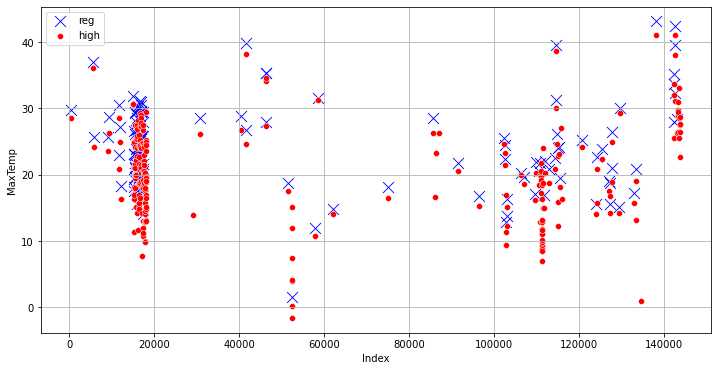

In [65]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_reg,y='MaxTemp',x=df_reg.index,label='reg',marker='x',s=120,alpha=1,color='blue')
sns.scatterplot(data=df_high,y='MaxTemp',x=df_high.index,label='high', color='red')
plt.xlabel('Index')
plt.ylabel('MaxTemp')
# plt.legend()
plt.grid()
plt.show()

Both methods got similar results as can be seen in the previous plot but the **linear models predictions tend to predict higher temperatures** and had such a great R2 score, the predictions from the linear regression model will be used.

In [66]:
df['MaxTemp']=df_MaxTemp_reg['MaxTemp']

In [67]:
df['MaxTemp'].iloc[nan_indices_MaxTemp]

458       29.8
5517      37.0
5860      25.7
9100      25.7
9407      28.7
          ... 
143758     NaN
143779     NaN
143804     NaN
143821     NaN
143853     NaN
Name: MaxTemp, Length: 239, dtype: float64

In [68]:
np.isnan(df['MaxTemp']).sum()

109

As there are few values where MaxTemp is a nan value, it is acceptable to drop the rows that do not have MaxTemp values

In [69]:
df.dropna(subset=['MaxTemp'],inplace=True)

# Rainfall

In [70]:
df['Rainfall'].isnull().sum(), df['Rainfall'].isnull().sum()/len(df)*100

(1392, 0.980274786797276)

In [71]:
df.corr()['Rainfall'].drop('Rainfall').sort_values(ascending=False)

Humidity3pm      0.255315
Rain Tomorrow    0.239338
Humidity9am      0.224042
Cloud9am         0.198618
Cloud3pm         0.172021
WindGustSpeed    0.133500
MinTemp          0.103828
WindSpeed9am     0.086473
North            0.059895
WindSpeed3pm     0.057746
Temp9am          0.010606
Center           0.005647
Day              0.001404
Year            -0.009740
Month           -0.030623
South           -0.049317
Evaporation     -0.064499
MaxTemp         -0.074803
Temp3pm         -0.079175
Pressure3pm     -0.126763
Pressure9am     -0.168110
Sunshine        -0.227521
Name: Rainfall, dtype: float64

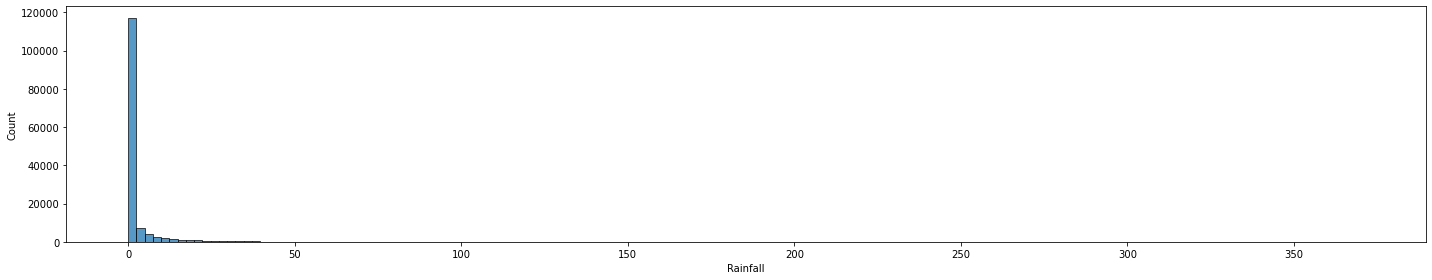

In [72]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df[['Rainfall']], x="Rainfall", bins =150)

ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

In [73]:
df['Rainfall'].sort_values(ascending=False,na_position='last').head(30)

9368      371.0
140071    367.6
87242     278.4
87995     268.6
89371     247.2
17321     240.0
93344     236.8
42010     225.0
11681     219.6
142163    210.6
10485     208.5
93675     206.8
88222     206.2
44916     192.0
9105      189.0
140072    184.6
91455     183.4
88016     183.0
86414     182.6
140384    182.2
91360     178.2
93323     177.6
89070     175.2
95150     174.6
10486     172.2
94075     170.4
85280     168.4
143335    167.0
41231     166.8
93757     165.2
Name: Rainfall, dtype: float64

Through the last representations, one can conlude that **there are some outliers in the Rainfall feature**. 

Taking into account that the last two values are above 300, being so far from the rest, and that they are only represented once, these rows will be dropped.

In [74]:
df.drop(df[df['Rainfall'] > 300].index, inplace = True)

As there are few Rainfall null values and the correlations are low with every feature, even Rain Tomorrow, the null values will be dropped

In [75]:
df = df.dropna(subset=['Rainfall'])

# Evaporation

Determining the amount if null values in the Evaporation column:

In [76]:
df['Evaporation'].isnull().sum(), df['Evaporation'].isnull().sum()/len(df)*100

(59549, 42.35137653175162)

In [77]:
df.corr()['Evaporation'].drop('Evaporation').sort_values(ascending=False)

MaxTemp          0.588940
Temp3pm          0.574310
Temp9am          0.545369
MinTemp          0.467309
Sunshine         0.366668
WindGustSpeed    0.203395
WindSpeed9am     0.194268
WindSpeed3pm     0.129199
Year             0.084136
Center           0.074403
North            0.051289
Day             -0.008356
Month           -0.027831
Rainfall        -0.064499
South           -0.094483
Rain Tomorrow   -0.119046
Cloud3pm        -0.184425
Cloud9am        -0.185176
Pressure9am     -0.269979
Pressure3pm     -0.293180
Humidity3pm     -0.393167
Humidity9am     -0.506116
Name: Evaporation, dtype: float64

<AxesSubplot:xlabel='Evaporation', ylabel='Count'>

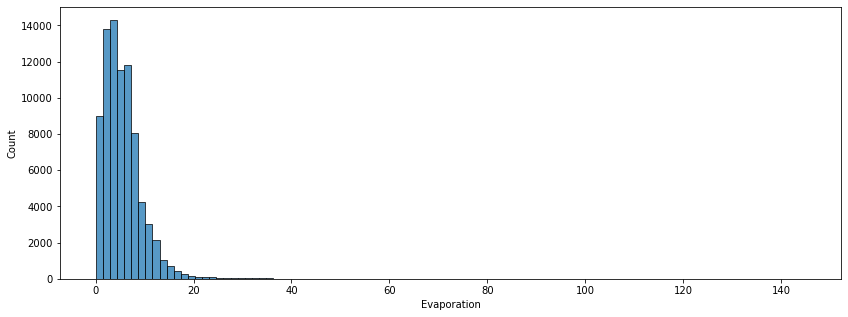

In [78]:
plt.figure(figsize=(14,5))
sns.histplot(data=df,x='Evaporation',bins=100)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Evaporation'>

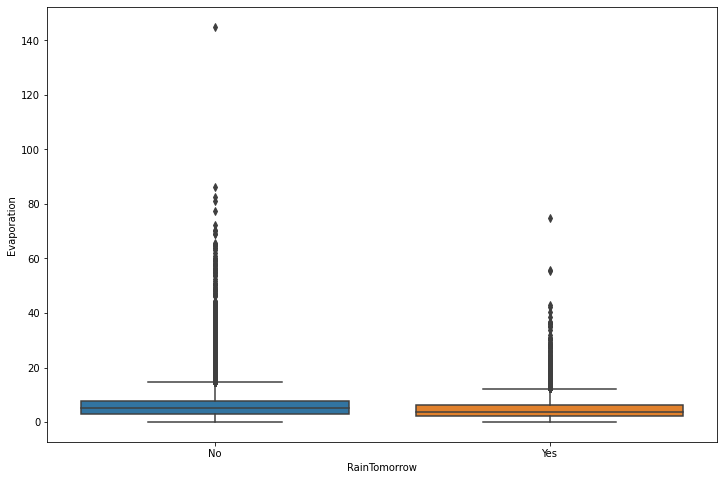

In [79]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Evaporation',data=df,x='RainTomorrow', palette='tab10')

Through the previous boxplot it can be seen that there is not a considerable difference between the values of Evaporation and the Rain Tomorrow feature 

<AxesSubplot:xlabel='Month', ylabel='Evaporation'>

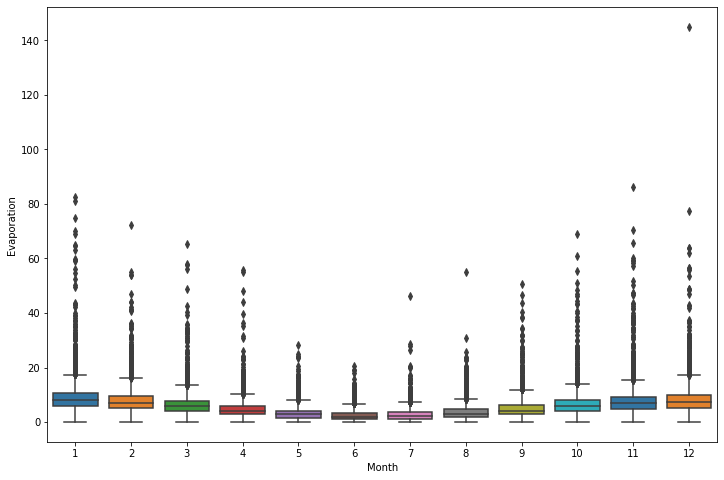

In [80]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Evaporation',data=df,x='Month', palette='tab10')

In the previous figure it can be seen that the months where raining is more common, May, June, July and August, have smaller values of Evaporation.

As there are **too many nan values** in this column, corresponding to **42%** of the total values, the **Rainfall** feature has **low correlation** with the variable **Rain Tomorrow**, and for all the previous figures that wer shown, the Evaporation column will be dropped. 

It would not be wise to drop the rows that have nan values as they are so many and a huge amount of data would be wiped.

In [81]:
df.drop(['Evaporation'],axis=1, inplace=True)

# Sunshine

In [82]:
df.corr()['Rain Tomorrow']['Sunshine']

-0.45176246866470327

Sunshine is a highly correlated variable.

<AxesSubplot:xlabel='Sunshine', ylabel='Count'>

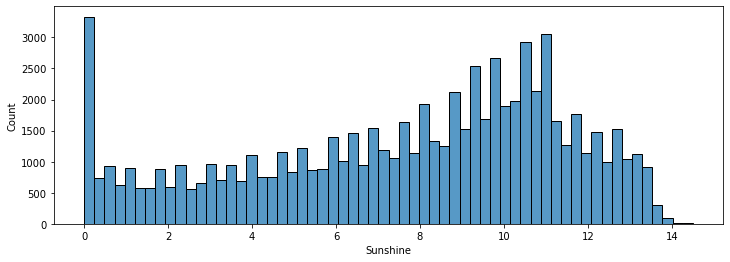

In [83]:
plt.figure(figsize=(12,4))
sns.histplot(data=df['Sunshine'],bins=60)

In [84]:
initial_nans = df['Sunshine'].isnull().sum()
initial_nans

66645

In [85]:
df['Sunshine'].isnull().sum()/len(df)*100

47.39806695256993

Sunshine has the highest percentage of null values, but also the highest correlation with RainTomorrow so some methods will be tried to fulfill its null values

In [86]:
df.corr()['Sunshine'].drop('Sunshine').sort_values()

Cloud3pm        -0.704603
Cloud9am        -0.675842
Humidity3pm     -0.629599
Humidity9am     -0.492779
Rain Tomorrow   -0.451762
Rainfall        -0.231169
South           -0.050332
WindGustSpeed   -0.032091
Pressure3pm     -0.020332
Day             -0.001459
WindSpeed9am     0.009260
Year             0.011782
North            0.014617
Month            0.024057
Pressure9am      0.040992
Center           0.054067
WindSpeed3pm     0.056615
MinTemp          0.073371
Temp9am          0.291257
MaxTemp          0.470272
Temp3pm          0.490404
Name: Sunshine, dtype: float64

High correlation with Cloud3pm and Could9am, as expected. However, these also have high percentage of null values. So, Humidity3pm shall be considered for the next step, where null values are deduced from correlations.

In [87]:
print(df[['Sunshine', 'Cloud3pm']].isnull().all(axis=1).sum(),
df[['Sunshine', 'Cloud9am']].isnull().all(axis=1).sum(),
df[['Sunshine', 'Humidity3pm','Humidity9am']].isnull().all(axis=1).sum())

46708 44912 716


There are 46708 instances where Sunshine and Cloud3pm are both null, 44912 instances where Sunshine and Cloud9am are both null, 716 instances where Sunshine, Humidity3pm and Humidity9am are null

In [88]:
LR_var1 = 'Sunshine'
LR_var2 = 'Cloud3pm'

initial_nans = df[LR_var1].isnull().sum()

df_temp = df.dropna(subset=[LR_var1])
df_temp = df_temp.dropna(subset=[LR_var2])

X = df_temp[LR_var2].values.reshape(-1,1)
y = df_temp[LR_var1].values.reshape(-1,1)


## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Print the interception and coefficient
print('{} = {:.4f} + {:.4f} * {}'.format(LR_var1,regr.intercept_[0], regr.coef_[0][0],LR_var2))

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
r2_value = r2_score(y, regr.predict(X))
print('R^2: {:.4f}'.format(r2_value))

Var1_linear = {LR_var1:regr.intercept_[0]+df[LR_var2]*regr.coef_[0][0]}

var1_df = pd.DataFrame(data=Var1_linear)
df=df.fillna(var1_df)

print('Number of rows corrected: {}'.format(initial_nans-df[LR_var1].isnull().sum()))

Sunshine = 11.9761 + -0.9988 * Cloud3pm
R^2: 0.4965
Number of rows corrected: 19937


In [89]:
LR_var1 = 'Sunshine'
LR_var2 = 'Cloud9am'

initial_nans = df[LR_var1].isnull().sum()

df_temp = df.dropna(subset=[LR_var1])
df_temp = df_temp.dropna(subset=[LR_var2])

X = df_temp[LR_var2].values.reshape(-1,1)
y = df_temp[LR_var1].values.reshape(-1,1)


## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Print the interception and coefficient
print('{} = {:.4f} + {:.4f} * {}'.format(LR_var1,regr.intercept_[0], regr.coef_[0][0],LR_var2))

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
r2_value = r2_score(y, regr.predict(X))
print('R^2: {:.4f}'.format(r2_value))

Var1_linear = {LR_var1:regr.intercept_[0]+df[LR_var2]*regr.coef_[0][0]}

var1_df = pd.DataFrame(data=Var1_linear)
df=df.fillna(var1_df)

print('Number of rows corrected: {}'.format(initial_nans-df[LR_var1].isnull().sum()))

Sunshine = 11.1263 + -0.8190 * Cloud9am
R^2: 0.4255
Number of rows corrected: 5203


In [96]:
# KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform')

# Features to be used for imputation and target variable
features = df[['Humidity3pm', 'Humidity9am', 'Cloud9am', 'Cloud3pm']]
target = df[['Sunshine']]
df_to_impute = pd.concat([features, target], axis=1)

# Perform the imputation
imputed_data = imputer.fit_transform(df_to_impute)

df['Sunshine'] = imputed_data[:, -1]

In [98]:
df['Sunshine'] = imputed_data[:, -1]

In [100]:
df['Sunshine'].isnull().sum()

0

In [105]:
df.corr()['Sunshine'].drop('Sunshine').sort_values()

Cloud3pm        -0.757933
Cloud9am        -0.664716
Humidity3pm     -0.564298
Humidity9am     -0.462832
Rain Tomorrow   -0.377810
Rainfall        -0.208398
South           -0.059882
Pressure3pm     -0.019336
WindGustSpeed   -0.018882
Year            -0.004258
Day             -0.003117
WindSpeed9am     0.008835
North            0.022052
Month            0.025698
Pressure9am      0.034519
WindSpeed3pm     0.040515
MinTemp          0.057781
Center           0.058149
Temp9am          0.250574
MaxTemp          0.396477
Temp3pm          0.417016
Name: Sunshine, dtype: float64

By looking at the correlations after making the value imputations, it is possible to see that they did not change greatly. Especially Rain Tomorrow, that before had a correaltion of -0.45 and now has a correlation of -0.38

# WindGustDir

In [101]:
df['WindGustDir'].nunique()

16

In [102]:
df['WindGustDir'].isnull().sum(), df['WindGustDir'].isnull().sum()/len(df)*100

(9014, 6.410776134900822)

In [106]:
WindGustDir_dummy = pd.get_dummies(df['WindGustDir'], dtype=int)
df2 = df.copy()
df2 = pd.concat([df2, WindGustDir_dummy], axis=1)
df2.head()

,Date,Year,Month,Day,Location,Center,North,South,MinTemp,MaxTemp,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2008-12-01,2008,12,1,South,0,0,1,13.4,22.9,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,2008,12,2,South,0,0,1,7.4,25.1,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,2008,12,3,South,0,0,1,12.9,25.7,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,2008,12,4,South,0,0,1,9.2,28.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,2008,12,5,South,0,0,1,17.5,32.3,...,0,0,0,0,0,0,0,1,0,0


In [107]:
WindGustDir_dummy.columns

Index(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object')

In [108]:
df2[['Rain Tomorrow', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW']].corr()['Rain Tomorrow'].drop('Rain Tomorrow').sort_values()

E     -0.047187
ENE   -0.036868
ESE   -0.033741
SE    -0.023474
NE    -0.020241
SSE   -0.018422
SW    -0.012921
SSW   -0.002334
S      0.000254
NNE    0.003639
WSW    0.005656
W      0.028488
N      0.029486
NNW    0.032140
WNW    0.033894
NW     0.035913
Name: Rain Tomorrow, dtype: float64

Analyzing the correlation specifically with Rain Tomorrow it is verifiable that all the dummy variables created for WindGustDir have correlations between -0.047 and 0.036, which is very low. As there more than 8000 null values, this feature shall be ignored.

In [109]:
df =df.drop(['WindGustDir'],axis=1)

# WindGustSpeed

In [110]:
df['WindGustSpeed'].isnull().sum(), df['WindGustSpeed'].isnull().sum()/len(df)*100

(8956, 6.369526410491654)

In [111]:
df.corr()['WindGustSpeed'].sort_values(ascending=False).drop('WindGustSpeed')

WindSpeed3pm     0.686869
WindSpeed9am     0.604520
Rain Tomorrow    0.234275
MinTemp          0.177706
Temp9am          0.148438
Rainfall         0.133422
Cloud3pm         0.109345
Cloud9am         0.071157
MaxTemp          0.068488
Month            0.060520
Temp3pm          0.033494
North            0.026799
South            0.004400
Day             -0.009473
Sunshine        -0.018882
Humidity3pm     -0.026676
Year            -0.032888
Center          -0.033075
Humidity9am     -0.215146
Pressure3pm     -0.412913
Pressure9am     -0.457742
Name: WindGustSpeed, dtype: float64

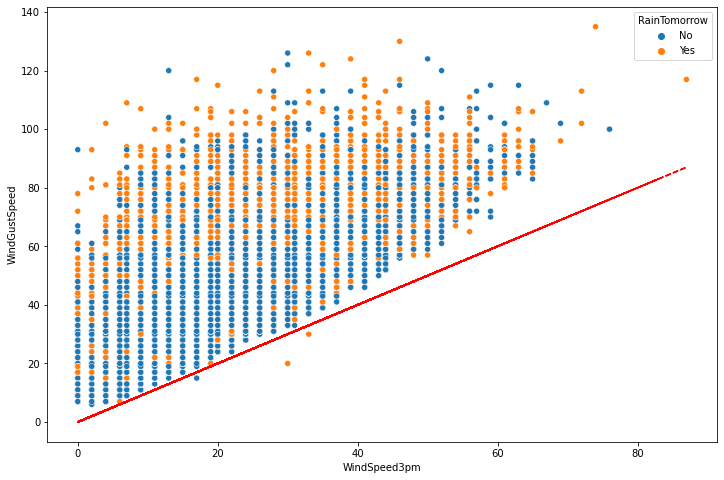

In [112]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='WindSpeed3pm',y='WindGustSpeed',data=df,hue='RainTomorrow')
# Add a line plot with the same values for x and y
X = df['WindSpeed3pm'].to_numpy()
plt.plot(X, X, color='red', linestyle='--')  # Adding a red dashed line
plt.show()

WindGustSpeed is the value of the **strongest wind gust**, while WindSpeed3pm is the wind speed (km/hr) averaged over 10 minutes prior to 3pm. This means the **first is always higher or equal to the latter**. The **remaining points are considered outliers**, and so dropped. The **same logic applies to the feature WindSpeed9am**.

In [113]:
df.drop(df[df['WindGustSpeed'] < df['WindSpeed3pm']].index, inplace = True)
df.drop(df[df['WindGustSpeed'] < df['WindSpeed9am']].index, inplace = True)

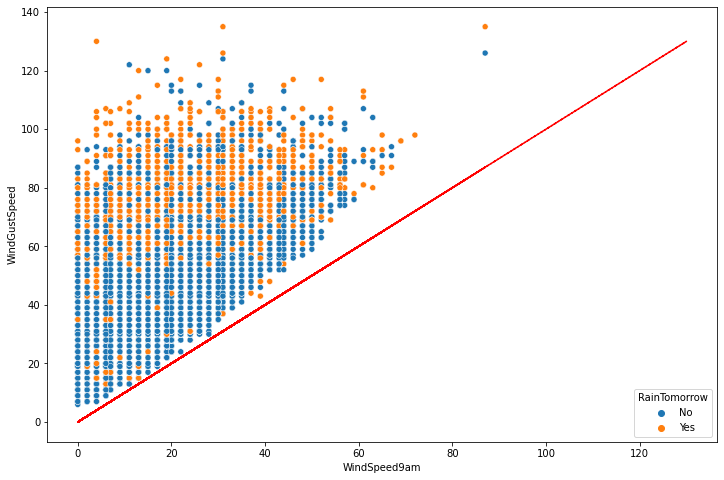

In [114]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='WindSpeed9am',y='WindGustSpeed',data=df,hue='RainTomorrow')
X = df['WindSpeed9am'].to_numpy()
plt.plot(X, X, color='red', linestyle='--')  # Adding a red dashed line
plt.show()

In [115]:
print(df[['WindGustSpeed', 'WindSpeed9am']].isnull().all(axis=1).sum(),
df[['WindGustSpeed', 'WindSpeed3pm']].isnull().all(axis=1).sum())

871 2144


In [116]:
LR_var1 = 'WindGustSpeed'
LR_var2 = 'WindSpeed3pm'
LR_var3 = 'WindSpeed9am'

nan_indices = np.where(np.isnan(df[LR_var1]))[0]
print(len(nan_indices))

df_reg = df[[LR_var1,LR_var2,LR_var3]]

Reg_Inputs = df_reg.dropna(subset=(LR_var1,LR_var2,LR_var3))
X=Reg_Inputs[[LR_var2,LR_var3]].values
Y=Reg_Inputs[LR_var1].values

reg =LinearRegression().fit(X,Y)

r2_value = r2_score(Y, reg.predict(X))
print('R^2 of the linear regression model: {:.4f}'.format(r2_value))

df[LR_var1] = df.apply(lambda x: fill_col_LR(x[LR_var2], x[LR_var3], x[LR_var1]), axis=1)
print('Number of rows corrected: {}'.format(len(nan_indices)-df[LR_var1].isnull().sum()))
np.isnan(df[LR_var1].iloc[nan_indices]).sum()

8956
R^2 of the linear regression model: 0.5560
Number of rows corrected: 6650


2306

In [117]:
LR_var1 = 'WindGustSpeed'
LR_var2 = 'WindSpeed9am'

initial_nans = df[LR_var1].isnull().sum()

df_temp = df.dropna(subset=[LR_var1])
df_temp = df_temp.dropna(subset=[LR_var2])

X = df_temp[LR_var2].values.reshape(-1,1)
y = df_temp[LR_var1].values.reshape(-1,1)


## Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)

## Print the interception and coefficient
print('{} = {:.4f} + {:.4f} * {}'.format(LR_var1,regr.intercept_[0], regr.coef_[0][0],LR_var2))

## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
r2_value = r2_score(y, regr.predict(X))
print('R^2: {:.4f}'.format(r2_value))


Var1_linear = {LR_var1:regr.intercept_[0]+df[LR_var2]*regr.coef_[0][0]}
var1_df = pd.DataFrame(data=Var1_linear)
df=df.fillna(var1_df)

print('Number of rows corrected: {}'.format(initial_nans-df[LR_var1].isnull().sum()))
print('Number of rows eliminated: {}'.format(df[LR_var1].isnull().sum()))

df = df.dropna(subset=[LR_var1])

WindGustSpeed = 26.6335 + 0.9394 * WindSpeed9am
R^2: 0.3770
Number of rows corrected: 1435
Number of rows eliminated: 871


AS there were few instances with null values, they were dropped

# WindDir9am

In [118]:
df['WindDir9am'].nunique()

16

In [119]:
WindDir9am_dummy = pd.get_dummies(df['WindDir9am'])
df2 = df.copy()
df2 = pd.concat([df2, WindDir9am_dummy], axis=1)
df2.head()

,Date,Year,Month,Day,Location,Center,North,South,MinTemp,MaxTemp,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2008-12-01,2008,12,1,South,0,0,1,13.4,22.9,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,2008,12,2,South,0,0,1,7.4,25.1,...,1,0,0,0,0,0,0,0,0,0
2,2008-12-03,2008,12,3,South,0,0,1,12.9,25.7,...,0,0,0,0,0,0,0,1,0,0
3,2008-12-04,2008,12,4,South,0,0,1,9.2,28.0,...,0,0,0,1,0,0,0,0,0,0
4,2008-12-05,2008,12,5,South,0,0,1,17.5,32.3,...,0,0,0,0,0,0,0,0,0,0


The matrix correlation for WindDir9am is very similar to the one obtained for WindGustDir, and the same conclusions shall be taken here once again.

In [120]:
df2[['Rain Tomorrow', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW']].corr()['Rain Tomorrow'].drop('Rain Tomorrow').sort_values()

E     -0.048953
ESE   -0.043089
SE    -0.038237
SSE   -0.027959
ENE   -0.027405
S     -0.016110
NE    -0.008795
SSW   -0.001431
SW     0.004401
WSW    0.011961
W      0.022724
WNW    0.024906
NNE    0.026876
NW     0.033346
NNW    0.050650
N      0.059267
Name: Rain Tomorrow, dtype: float64

All the dummy variables created for WindDir9am have correlations between -0.049 and 0.06, which is very low, similarly to the ones obtained for WindGustDir. This feature will be ignored as well for the same reason. 

In [121]:
df =df.drop(['WindDir9am'],axis=1)

# WindDir3pm

In [122]:
df['WindDir3pm'].nunique()

16

In [123]:
WindDir3pm_dummy = pd.get_dummies(df['WindDir3pm'])
df2 = df.copy()
df2 = pd.concat([df2, WindDir3pm_dummy], axis=1)
df2.head()

,Date,Year,Month,Day,Location,Center,North,South,MinTemp,MaxTemp,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2008-12-01,2008,12,1,South,0,0,1,13.4,22.9,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,2008,12,2,South,0,0,1,7.4,25.1,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,2008,12,3,South,0,0,1,12.9,25.7,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,2008,12,4,South,0,0,1,9.2,28.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,2008,12,5,South,0,0,1,17.5,32.3,...,0,1,0,0,0,0,0,0,0,0


In [124]:
df2[['Rain Tomorrow', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW']].corr()['Rain Tomorrow'].drop('Rain Tomorrow').sort_values()

ESE   -0.032474
E     -0.031652
ENE   -0.026148
SE    -0.022831
SSE   -0.020889
NE    -0.020258
SW    -0.018432
S     -0.006229
SSW   -0.001077
WSW   -0.000404
NNE    0.011357
W      0.020728
WNW    0.033510
NNW    0.033750
N      0.034378
NW     0.035671
Name: Rain Tomorrow, dtype: float64

The same results were obtained as in WindGustDir and WindDir9am, so as before, WindDir3pm will be left out.

In [125]:
df =df.drop(['WindDir3pm'],axis=1)

# WindSpeed9am

In [126]:
df.corr()['WindSpeed9am'].drop('WindSpeed9am').sort_values(ascending=False)

WindGustSpeed    0.617800
WindSpeed3pm     0.520010
MinTemp          0.175837
Temp9am          0.128061
Rain Tomorrow    0.089726
Rainfall         0.087485
Cloud3pm         0.053393
Center           0.052116
Month            0.051226
North            0.046311
Cloud9am         0.024070
MaxTemp          0.014428
Sunshine         0.008847
Temp3pm          0.004898
Day             -0.009186
Year            -0.022368
Humidity3pm     -0.031655
South           -0.073683
Pressure3pm     -0.174570
Pressure9am     -0.227545
Humidity9am     -0.270470
Name: WindSpeed9am, dtype: float64

In [127]:
df['WindSpeed9am'].isnull().sum(), df['WindSpeed9am'].isnull().sum()/len(df)*100

(122, 0.08730999341596771)

Note that although we removed the outliers relative to WindGustSpeed having lower values than WindSpeed9am, a few more have appeared. This is because the linear regression performed when substituting NaNs was according to the feature WindSpeed3pm. This time we will not be removing them again given that they are only approximations of the true values, not outliers.

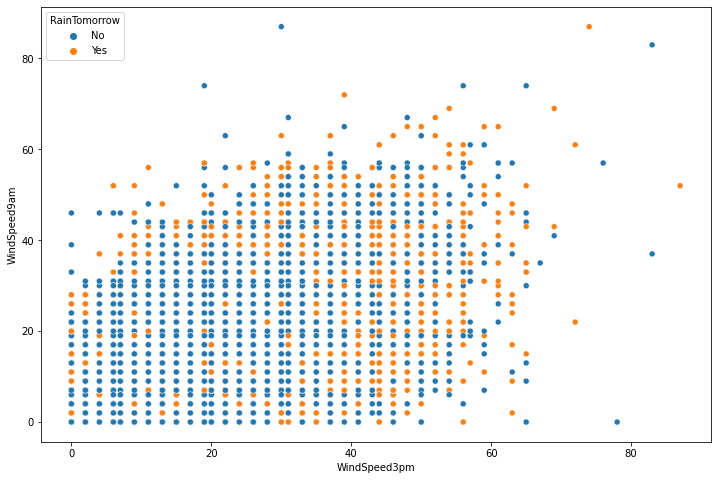

In [129]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='WindSpeed3pm',y='WindSpeed9am',data=df,hue='RainTomorrow')
plt.show()

As the linear regression models did not reveal to be good enough to fill in null values of WindSpeed9am, the null values are dropped as they are so few

In [130]:
df = df.dropna(subset=['WindSpeed9am'])

# WindSpeed3pm

<AxesSubplot:xlabel='Month', ylabel='WindSpeed3pm'>

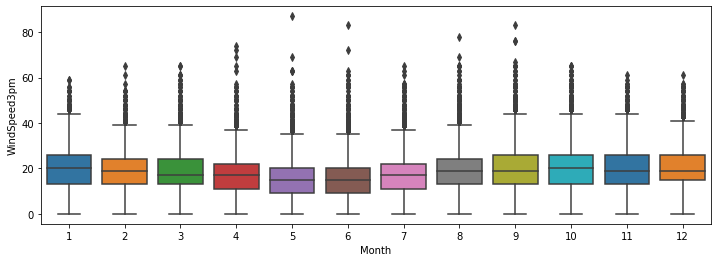

In [131]:
plt.figure(figsize=(12,4))
sns.boxplot(y='WindSpeed3pm',data=df,x='Month', palette='tab10')

This graph demonstrates that there are some high values considered to be anomalies. For this reason, values above 60 will be considered as outliers and removed.

In [132]:
df.drop(df[df['WindSpeed3pm'] > 60].index, inplace = True)
df['WindSpeed3pm'].isnull().sum(), df['WindSpeed3pm'].isnull().sum()/len(df)*100

(1657, 1.1873965417165298)

1.19% of null values is low enough for the values to be droped.

In [133]:
df = df.dropna(subset=['WindSpeed3pm'])

# Humidity9am

In [134]:
df['Humidity9am'].isnull().sum(), df['Humidity9am'].isnull().sum()/len(df)*100

(1177, 0.8535665593362921)

<AxesSubplot:xlabel='Month', ylabel='Humidity9am'>

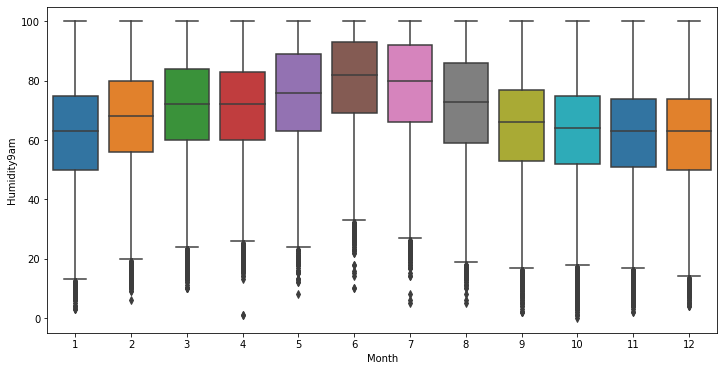

In [135]:
plt.figure(figsize=(12,6))
sns.boxplot(y='Humidity9am',data=df,x='Month',palette='tab10')

The data has no significant discrepancy therefore no outliers were assumed

In [136]:
df.corr()['Humidity9am'].drop('Humidity9am').sort_values(ascending=False)

Humidity3pm      0.668862
Cloud9am         0.454479
Cloud3pm         0.358738
Rain Tomorrow    0.257688
Rainfall         0.225849
Pressure3pm      0.186837
South            0.166040
Pressure9am      0.139317
Day              0.016164
Year             0.007091
North           -0.037513
Month           -0.090226
WindSpeed3pm    -0.146178
Center          -0.184831
WindGustSpeed   -0.219869
MinTemp         -0.238053
WindSpeed9am    -0.272033
Sunshine        -0.463750
Temp9am         -0.476029
Temp3pm         -0.501606
MaxTemp         -0.508511
Name: Humidity9am, dtype: float64

In [137]:
print(df[['Humidity9am', 'Humidity3pm']].isnull().all(axis=1).sum(),
df[['Humidity9am', 'MaxTemp']].isnull().all(axis=1).sum(),
df[['MaxTemp', 'Humidity3pm']].isnull().all(axis=1).sum())

802 0 0


In [138]:
LR_var1 = 'Humidity9am'
LR_var2 = 'Humidity3pm'
LR_var3 = 'MaxTemp'

nan_indices = np.where(np.isnan(df[LR_var1]))[0]
print(len(nan_indices))

df_reg = df[[LR_var1,LR_var2,LR_var3]]

Reg_Inputs = df_reg.dropna(subset=(LR_var1,LR_var2,LR_var3))
X=Reg_Inputs[[LR_var2,LR_var3]].values
Y=Reg_Inputs[LR_var1].values

reg =LinearRegression().fit(X,Y)

r2_value = r2_score(Y, reg.predict(X))
print('R^2 of the linear regression model: {:.4f}'.format(r2_value))

df[LR_var1] = df.apply(lambda x: fill_col_LR(x[LR_var2], x[LR_var3], x[LR_var1]), axis=1)
print('Number of rows corrected: {}'.format(len(nan_indices)-df[LR_var1].isnull().sum()))

np.isnan(df[LR_var1].iloc[nan_indices]).sum()

1177
R^2 of the linear regression model: 0.4865
Number of rows corrected: 375


802

As there are few instances with null values, they will be dropped

In [139]:
df = df.dropna(subset=[LR_var1])

# Humidity3pm 

<AxesSubplot:xlabel='Month', ylabel='Humidity3pm'>

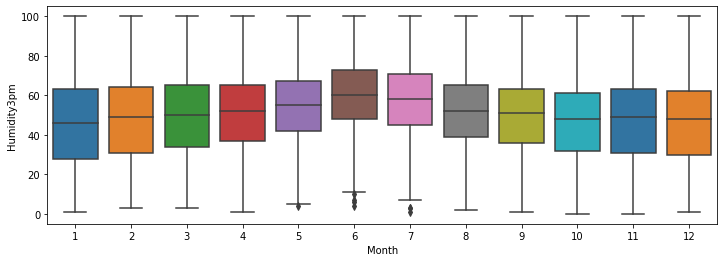

In [140]:
plt.figure(figsize=(12,4))
sns.boxplot(y='Humidity3pm',data=df,x='Month', palette='tab10')

The data has no significant discrepancy therefore no outliers were assumed

In [141]:
df['Humidity3pm'].isnull().sum(), df['Humidity3pm'].isnull().sum()/len(df)*100

(867, 0.6324312495440951)

In [142]:
df.corr()['Humidity3pm'].drop('Humidity3pm').sort_values(ascending=False)

Humidity9am      0.669935
Cloud3pm         0.523624
Cloud9am         0.517581
Rain Tomorrow    0.447542
Rainfall         0.257117
North            0.057012
Pressure3pm      0.051463
WindSpeed3pm     0.015732
Day              0.013222
MinTemp          0.003908
Year            -0.010409
South           -0.011006
Month           -0.018405
Pressure9am     -0.027934
WindSpeed9am    -0.032103
WindGustSpeed   -0.032320
Center          -0.041711
Temp9am         -0.225251
MaxTemp         -0.510841
Temp3pm         -0.559455
Sunshine        -0.565209
Name: Humidity3pm, dtype: float64

In [143]:
print(df[['Humidity3pm', 'Humidity9am']].isnull().all(axis=1).sum(),
df[['Humidity3pm', 'Temp3pm']].isnull().all(axis=1).sum(),
df[['Humidity3pm', 'Sunshine']].isnull().all(axis=1).sum())

0 713 0


In [144]:
LR_var1 = 'Humidity3pm'
LR_var2 = 'Humidity9am'
LR_var3 = 'Sunshine'

nan_indices = np.where(np.isnan(df[LR_var1]))[0]
print(len(nan_indices))

df_reg = df[[LR_var1,LR_var2,LR_var3]]

Reg_Inputs = df_reg.dropna(subset=(LR_var1,LR_var2,LR_var3))
X=Reg_Inputs[[LR_var2,LR_var3]].values
Y=Reg_Inputs[LR_var1].values

reg =LinearRegression().fit(X,Y)

r2_value = r2_score(Y, reg.predict(X))
print('R^2 of the linear regression model: {:.4f}'.format(r2_value))

df[LR_var1] = df.apply(lambda x: fill_col_LR(x[LR_var2], x[LR_var3], x[LR_var1]), axis=1)
print('Number of rows corrected: {}'.format(len(nan_indices)-df[LR_var1].isnull().sum()))
np.isnan(df[LR_var1].iloc[nan_indices]).sum()

867
R^2 of the linear regression model: 0.5312
Number of rows corrected: 867


0

# Pressure9am and Pressure3pm

<AxesSubplot:xlabel='Month', ylabel='Pressure9am'>

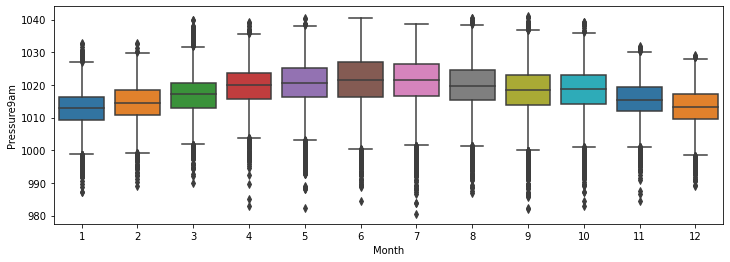

In [145]:
plt.figure(figsize=(12,4))
sns.boxplot(y='Pressure9am',data=df,x='Month', palette='tab10')

<AxesSubplot:xlabel='Month', ylabel='Pressure3pm'>

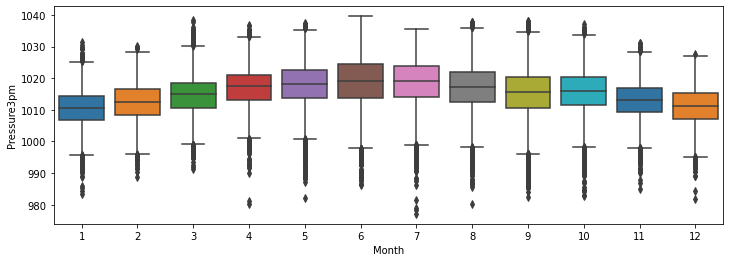

In [146]:
plt.figure(figsize=(12,4))
sns.boxplot(y='Pressure3pm',data=df,x='Month', palette='tab10')

The figure shows several values below 985 that can be percieved as outliers.

In [147]:
df.drop(df[df['Pressure9am'] < 985].index, inplace = True)
df.drop(df[df['Pressure3pm'] < 985].index, inplace = True)

df['Pressure9am'].isnull().sum(), df['Pressure9am'].isnull().sum()/len(df)*100

(11948, 8.717095663339753)

In [148]:
df['Pressure3pm'].isnull().sum(), df['Pressure3pm'].isnull().sum()/len(df)*100

(11883, 8.66967256172299)

In [149]:
df[['Rain Tomorrow', 'Pressure9am','Pressure3pm']].corr()[['Rain Tomorrow']].drop('Rain Tomorrow')

,Rain Tomorrow
Pressure9am,-0.246378
Pressure3pm,-0.226706


As there are so many null values and the correlation with the Rain Tomorrow feature is low for both columns, they will be dropped

In [150]:
df =df.drop(['Pressure9am', 'Pressure3pm'],axis=1)

# Temp3pm

In [151]:
df['Temp3pm'].isnull().sum(), df['Temp3pm'].isnull().sum()/len(df)*100

(713, 0.5201949454269539)

<AxesSubplot:xlabel='Temp3pm', ylabel='MaxTemp'>

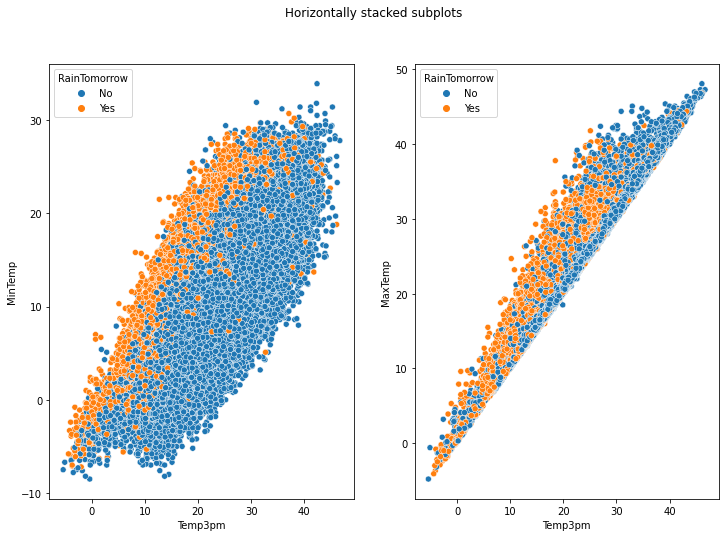

In [152]:
fig, ax = plt.subplots(1, 2,figsize=(12,8))
fig.suptitle('Horizontally stacked subplots')
sns.scatterplot(x='Temp3pm', y='MinTemp',data=df,hue='RainTomorrow', ax=ax[0])
sns.scatterplot(x='Temp3pm', y='MaxTemp',data=df,hue='RainTomorrow', ax=ax[1])

In [153]:
print(df[['Temp3pm', 'MinTemp']].isnull().all(axis=1).sum(),
df[['Temp3pm', 'MaxTemp']].isnull().all(axis=1).sum())

0 0


In [154]:
LR_var1 = 'Temp3pm'
LR_var2 = 'MinTemp'
LR_var3 = 'MaxTemp'

nan_indices = np.where(np.isnan(df[LR_var1]))[0]
print(len(nan_indices))

df_reg = df[[LR_var1,LR_var2,LR_var3]]

Reg_Inputs = df_reg.dropna(subset=(LR_var1,LR_var2,LR_var3))
X=Reg_Inputs[[LR_var2,LR_var3]].values
Y=Reg_Inputs[LR_var1].values

reg =LinearRegression().fit(X,Y)

r2_value = r2_score(Y, reg.predict(X))
print('R^2 of the linear regression model: {:.4f}'.format(r2_value))

df[LR_var1] = df.apply(lambda x: fill_col_LR(x[LR_var2], x[LR_var3], x[LR_var1]), axis=1)

print('Number of rows corrected: {}'.format(len(nan_indices)-df[LR_var1].isnull().sum()))
np.isnan(df[LR_var1].iloc[nan_indices]).sum()

713
R^2 of the linear regression model: 0.9699
Number of rows corrected: 713


0

As the model has a great R² score it is used to fill null values

# Cloud9am

In [155]:
df['Cloud9am'].isnull().sum(), df['Cloud9am'].isnull().sum()/len(df)*100

(50814, 37.073192085449136)

In [156]:
df.corr()['Cloud9am'].drop('Cloud9am').sort_values(ascending=False)

Cloud3pm         0.604610
Humidity3pm      0.519143
Humidity9am      0.454674
Rain Tomorrow    0.317561
Rainfall         0.200859
MinTemp          0.075134
WindGustSpeed    0.068033
Year             0.062065
South            0.056945
WindSpeed3pm     0.052036
WindSpeed9am     0.021971
Day              0.007686
Month           -0.009587
North           -0.025579
Center          -0.051040
Temp9am         -0.139784
MaxTemp         -0.290139
Temp3pm         -0.305612
Sunshine        -0.662077
Name: Cloud9am, dtype: float64

<AxesSubplot:xlabel='Cloud9am', ylabel='Sunshine'>

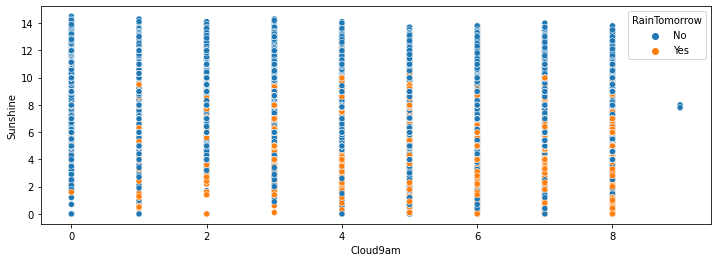

In [157]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='Cloud9am', y='Sunshine',data=df,hue='RainTomorrow')

From this graph we can see that there are some outliers. These can be considered outliers to due the fact that Cloud9am is **expressed in eights of sky covered** and it is not possible to have 9/8 of sky covered. So these points have to be removed.

In [158]:
df.drop(df[df['Cloud9am'] > 8].index, inplace = True)

Here a conditional value imputation based on grouped means will be used, taking into account the Sunshine variable

Because Cloud9am is expressed in eighths we have to round the mean of the variable to the closest unit.

In [159]:
MeanCloud9am = df.groupby(by=['Sunshine'])['Cloud9am'].mean()
MeanCloud9am = round(MeanCloud9am)
MeanCloud9am

Sunshine
0.000000     8.0
0.100000     7.0
0.200000     7.0
0.266667     NaN
0.300000     7.0
            ... 
14.000000    2.0
14.100000    2.0
14.200000    2.0
14.300000    1.0
14.500000    0.0
Name: Cloud9am, Length: 2379, dtype: float64

In [160]:
def fill_val(Cloud9am,Sunshine):

    if np.isnan(Cloud9am) and ~np.isnan(Sunshine):
        return MeanCloud9am[Sunshine]
    else:
        return Cloud9am

In [161]:
df['Cloud9am']= df.apply(lambda x: fill_val(x['Cloud9am'], x['Sunshine']), axis=1)
df['Cloud9am'].isnull().sum()

38004

<AxesSubplot:xlabel='Cloud9am', ylabel='Humidity3pm'>

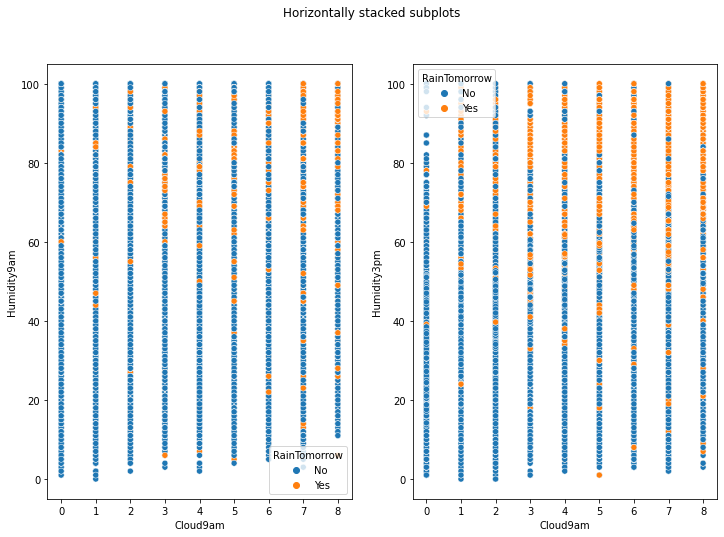

In [168]:
fig, ax = plt.subplots(1, 2,figsize=(12,8))
fig.suptitle('Horizontally stacked subplots')
sns.scatterplot(x='Cloud9am', y='Humidity9am',data=df,hue='RainTomorrow', ax=ax[0])
sns.scatterplot(x='Cloud9am', y='Humidity3pm',data=df,hue='RainTomorrow', ax=ax[1])

In [169]:
MeanCloud9am = df.groupby(by=['Humidity9am','Humidity3pm'])['Cloud9am'].mean()
MeanCloud9am = MeanCloud9am.interpolate(method='linear')

MeanCloud9am = round(MeanCloud9am)
MeanCloud9am

Humidity9am  Humidity3pm
0.0          0.0            1.0
1.0          1.0            0.0
             2.0            1.0
             4.0            0.0
2.0          0.0            2.0
                           ... 
107.1        98.0           8.0
107.3        97.0           8.0
             98.0           8.0
107.9        100.0          8.0
108.9        97.0           8.0
Name: Cloud9am, Length: 7410, dtype: float64

In [170]:
def fill_val(Humidity9am,Humidity3pm,Cloud9am):

    if np.isnan(Cloud9am) and ~np.isnan(Humidity9am) and ~np.isnan(Humidity3pm):
        return MeanCloud9am[Humidity9am, Humidity3pm]
    else:
        return Cloud9am

In [171]:
df['Cloud9am']= df.apply(lambda x: fill_val(x['Humidity9am'],x['Humidity3pm'], x['Cloud9am']), axis=1)
df['Cloud9am'].isnull().sum()

0

# Cloud3pm

The same procedure done for the Cloud9am will be done for this variable as well.

In [173]:
df['Cloud3pm'].isnull().sum(), df['Cloud3pm'].isnull().sum()/len(df)*100

(52892, 38.58983525703697)

In [174]:
df.corr()['Cloud3pm'].drop('Cloud3pm').sort_values(ascending=False)

Cloud9am         0.609439
Humidity3pm      0.523792
Rain Tomorrow    0.382235
Humidity9am      0.359196
Rainfall         0.174198
WindGustSpeed    0.101089
South            0.065504
WindSpeed9am     0.053223
Year             0.041392
WindSpeed3pm     0.023800
MinTemp          0.019840
Day             -0.000690
Month           -0.003571
North           -0.028530
Center          -0.059185
Temp9am         -0.128371
MaxTemp         -0.279125
Temp3pm         -0.318444
Sunshine        -0.757589
Name: Cloud3pm, dtype: float64

<AxesSubplot:xlabel='Cloud3pm', ylabel='Sunshine'>

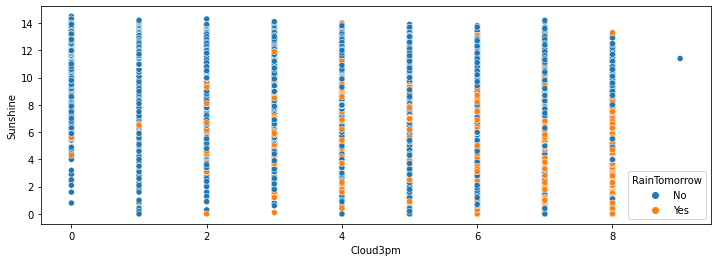

In [175]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='Cloud3pm', y='Sunshine',data=df,hue='RainTomorrow')

In [176]:
df.drop(df[df['Cloud9am'] > 8].index, inplace = True)

In [177]:
MeanCloud3pm = df.groupby(by=['Sunshine'])['Cloud3pm'].mean()
MeanCloud3pm = round(MeanCloud3pm)
MeanCloud3pm

Sunshine
0.000000     8.0
0.100000     8.0
0.200000     7.0
0.266667     NaN
0.300000     7.0
            ... 
14.000000    1.0
14.100000    4.0
14.200000    4.0
14.300000    1.0
14.500000    0.0
Name: Cloud3pm, Length: 2379, dtype: float64

In [178]:
def fill_val(Cloud3pm,Sunshine):

    if np.isnan(Cloud3pm) and ~np.isnan(Sunshine):
        return MeanCloud3pm[Sunshine]
    else:
        return Cloud3pm

In [179]:
df['Cloud3pm']= df.apply(lambda x: fill_val(x['Cloud3pm'], x['Sunshine']), axis=1)
df['Cloud3pm'].isnull().sum()

43000

<AxesSubplot:xlabel='Cloud3pm', ylabel='Humidity3pm'>

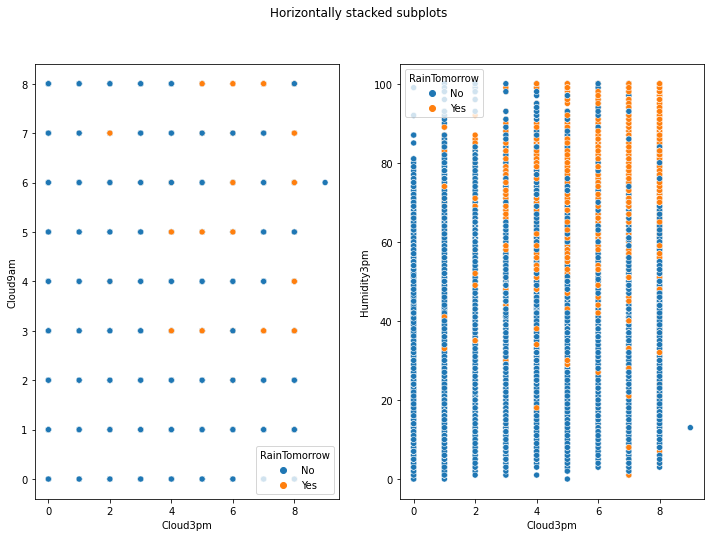

In [180]:
fig, ax = plt.subplots(1, 2,figsize=(12,8))
fig.suptitle('Horizontally stacked subplots')
sns.scatterplot(x='Cloud3pm', y='Cloud9am',data=df,hue='RainTomorrow', ax=ax[0])
sns.scatterplot(x='Cloud3pm', y='Humidity3pm',data=df,hue='RainTomorrow', ax=ax[1])

In [181]:
MeanCloud3pm = df.groupby(by=['Cloud9am','Humidity3pm'])['Cloud3pm'].mean()
MeanCloud3pm = MeanCloud3pm.interpolate(method='linear')

MeanCloud3pm = round(MeanCloud3pm)
MeanCloud3pm

Cloud9am  Humidity3pm
0.0       1.0            1.0
          2.0            0.0
          3.0            1.0
          4.0            1.0
          5.0            1.0
                        ... 
8.0       96.0           8.0
          97.0           8.0
          98.0           8.0
          99.0           8.0
          100.0          8.0
Name: Cloud3pm, Length: 1284, dtype: float64

In [182]:
def fill_val(Cloud9am,Humidity3pm,Cloud3pm):

    if np.isnan(Cloud3pm) and ~np.isnan(Cloud9am) and ~np.isnan(Humidity3pm):
        return MeanCloud3pm[Cloud9am, Humidity3pm]
    else:
        return Cloud3pm

In [183]:
df['Cloud3pm']= df.apply(lambda x: fill_val(x['Cloud9am'],x['Humidity3pm'], x['Cloud3pm']), axis=1)
df['Cloud3pm'].isnull().sum()

0

# RainToday

<AxesSubplot:xlabel='Rainfall', ylabel='RainToday'>

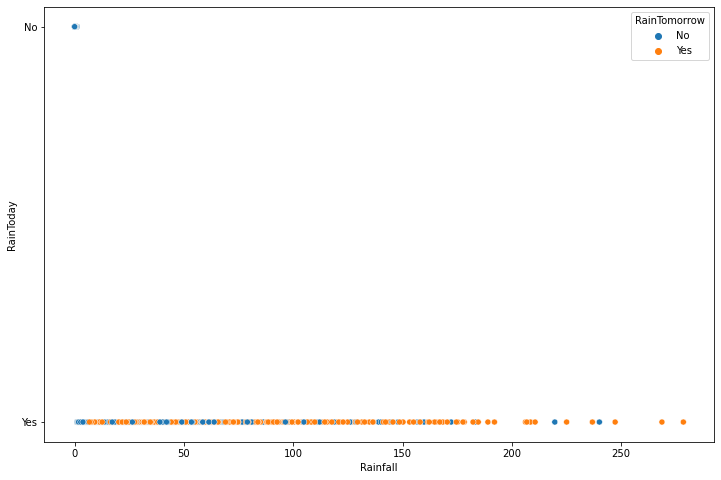

In [184]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Rainfall', y='RainToday',data=df,hue='RainTomorrow')

When Rainfall is more than 1mm, it is considered a rainy day. As we can see from the graph the data follows that statement and there are no strange values.

In [185]:
df = pd.get_dummies(df, columns=['RainToday'],drop_first=True, dtype=int)
df.rename(columns={'RainToday_Yes': 'Rain Today'}, inplace=True)

In [186]:
df['Rain Today'].isnull().sum()

0

# Reorganizing the dataframe

In [187]:
final_df =df.drop(['Location', 'RainTomorrow', 'Date'],axis=1)

In [188]:
final_df.isnull().sum()

Year             0
Month            0
Day              0
Center           0
North            0
South            0
MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Rain Tomorrow    0
Rain Today       0
dtype: int64

In [189]:
final_df.columns

Index(['Year', 'Month', 'Day', 'Center', 'North', 'South', 'MinTemp',
       'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Rain Tomorrow', 'Rain Today'],
      dtype='object')

In [190]:
new_order = ['Year', 'Month', 'Day', 'Center', 'North', 'South', 'MinTemp',
       'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Rain Today', 'Rain Tomorrow']

In [191]:
final_df = final_df[new_order]
final_df

,Year,Month,Day,Center,North,South,MinTemp,MaxTemp,Rainfall,Sunshine,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rain Today,Rain Tomorrow
0,2008,12,1,0,0,1,13.4,22.9,0.6,4.574588,...,20.0,24.0,71.0,22.0,8.0,6.0,16.9,21.8,0,0
1,2008,12,2,0,0,1,7.4,25.1,0.0,6.989182,...,4.0,22.0,44.0,25.0,3.0,3.0,17.2,24.3,0,0
2,2008,12,3,0,0,1,12.9,25.7,0.0,9.978443,...,19.0,26.0,38.0,30.0,4.0,2.0,21.0,23.2,0,0
3,2008,12,4,0,0,1,9.2,28.0,0.0,7.461850,...,11.0,9.0,45.0,16.0,1.0,2.0,18.1,26.5,0,0
4,2008,12,5,0,0,1,17.5,32.3,1.0,3.985550,...,7.0,20.0,82.0,33.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017,6,20,1,0,0,3.5,21.8,0.0,9.096045,...,15.0,13.0,59.0,27.0,3.0,3.0,9.4,20.9,0,0
145455,2017,6,21,1,0,0,2.8,23.4,0.0,10.161455,...,13.0,11.0,51.0,24.0,2.0,3.0,10.1,22.4,0,0
145456,2017,6,22,1,0,0,3.6,25.3,0.0,8.396412,...,13.0,9.0,56.0,21.0,2.0,3.0,10.9,24.5,0,0
145457,2017,6,23,1,0,0,5.4,26.9,0.0,6.316119,...,9.0,9.0,53.0,24.0,3.0,3.0,12.5,26.1,0,0


In [192]:
len(final_df)

137062

After dropping everything that was deemed not fit, we end up with 137062 instances, compared to the initial 145460 instances

In [193]:
final_df.to_csv('final_df.csv',index=False)